In [ ]:
from src.maddpg import MA_DDPG
from pettingzoo.mpe import simple_adversary_v3

In [6]:
env = simple_adversary_v3.parallel_env(max_cycles=25, continuous_actions=True)

In [8]:
ma_ddpg_agent =MA_DDPG(env, lr_actor = 0.01, lr_critic = 0.01, hidden_size1 = 64, hidden_size2 = 64, environment_name = 'simple_adversary_v3', 
                 buffer_size = 100000, batch_size = 1024, discount_factor=0.95, tau=0.01, checkpoint_directory='models/')

/Users/shri/Documents/programming_environments/marl_env/lib/python3.8/site-packages/pettingzoo/utils/conversions.py:158: UserWarning: The `action_spaces` dictionary is deprecated. Use the `action_space` function instead.
  warnings.warn(
/Users/shri/Documents/programming_environments/marl_env/lib/python3.8/site-packages/pettingzoo/utils/conversions.py:144: UserWarning: The `observation_spaces` dictionary is deprecated. Use the `observation_space` function instead.
  warnings.warn(


In [9]:
ma_ddpg_agent.train(10000)

Training Episode::   0%|          | 0/10000 [00:00<?, ?it/s]

/Users/shri/Documents/programming_environments/marl_env/lib/python3.8/site-packages/pettingzoo/utils/conversions.py:158: UserWarning: The `action_spaces` dictionary is deprecated. Use the `action_space` function instead.
  warnings.warn(
/Users/shri/Documents/programming_environments/marl_env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/shri/Documents/programming_environments/marl_env/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [10]:
import matplotlib.pyplot as plt

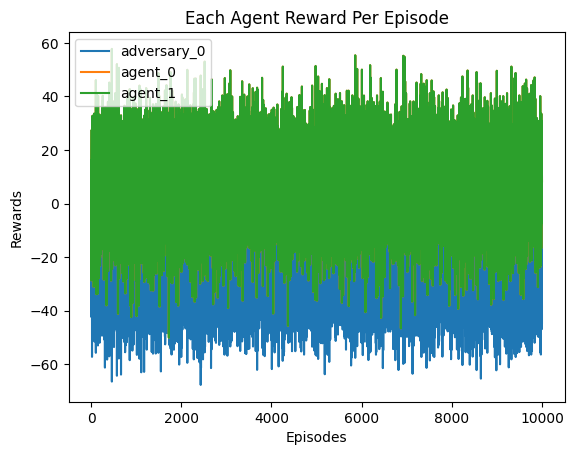

In [11]:
for agent in env.possible_agents:
    plt.plot(ma_ddpg_agent.each_agent_reward_per_episode[agent], label=agent)
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Each Agent Reward Per Episode') 
plt.legend()

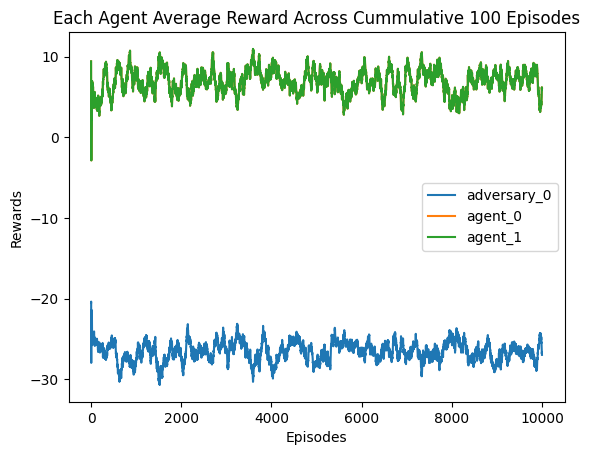

In [12]:
for agent in env.possible_agents:
    plt.plot(ma_ddpg_agent.each_agent_avg_reward_per_100_episodes[agent], label=agent)
plt.title('Each Agent Average Reward Across Cummulative 100 Episodes') 
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.legend()

Text(0, 0.5, 'Rewards')

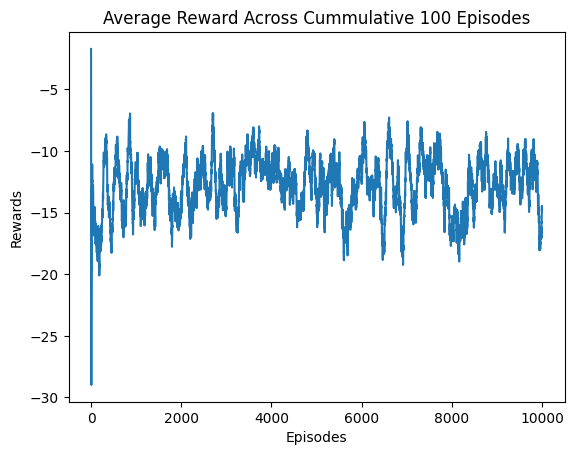

In [13]:
plt.plot(ma_ddpg_agent.avg_reward_across_last_100_episodes)
plt.title('Average Reward Across Cummulative 100 Episodes') 
plt.xlabel('Episodes')
plt.ylabel('Rewards')

Text(0, 0.5, 'Rewards')

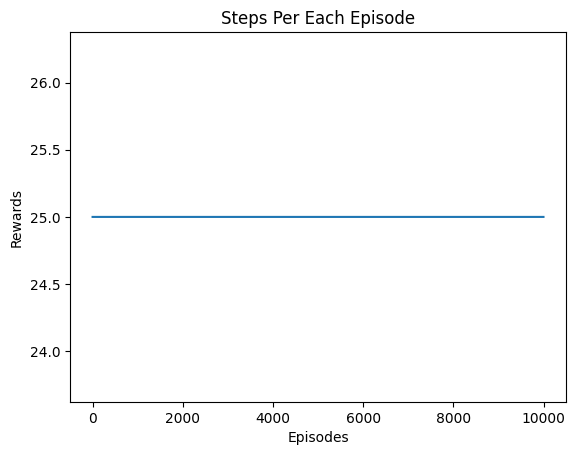

In [14]:
plt.plot(ma_ddpg_agent.steps_per_episode)
plt.title('Steps Per Each Episode') 
plt.xlabel('Episodes')
plt.ylabel('Rewards')

Text(0, 0.5, 'Rewards')

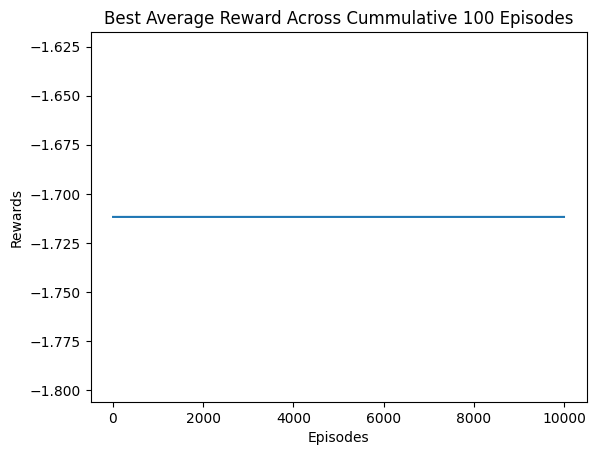

In [15]:
plt.plot(ma_ddpg_agent.best_avg_reward_per_100_episodes)
plt.title('Best Average Reward Across Cummulative 100 Episodes') 
plt.xlabel('Episodes')
plt.ylabel('Rewards')

#### Evaluation

In [19]:
ma_ddpg_agent.agents['adversary_0'].load_models()

In [20]:
ma_ddpg_agent.agents['agent_0'].load_models()

In [21]:
ma_ddpg_agent.agents['agent_1'].load_models()

In [23]:
rewards_per_episode = ma_ddpg_agent.evaluation(100)

/Users/shri/Documents/programming_environments/marl_env/lib/python3.8/site-packages/pettingzoo/utils/conversions.py:158: UserWarning: The `action_spaces` dictionary is deprecated. Use the `action_space` function instead.
  warnings.warn(


Text(0.5, 1.0, 'Evaluate')

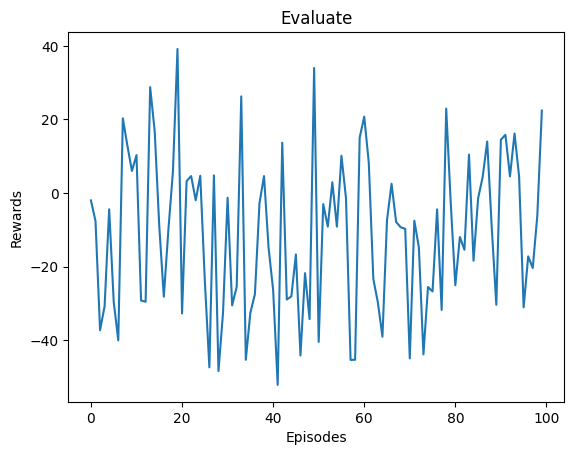

In [24]:
plt.plot(rewards_per_episode)
plt.title('Reward Across 100 Episodes') 
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Evaluate')